In [18]:
import pandas as pd
import numpy as np
import collections
import gensim 
from gensim.models import word2vec, phrases
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_numeric,\
                    strip_non_alphanum, strip_multiple_whitespaces, strip_short
from textblob import TextBlob, Word

import re
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

#function to process the column 'recipe' to the format of list-of-lists
import re
from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation, strip_numeric, strip_non_alphanum, strip_multiple_whitespaces, strip_short

#training fastText model on recipe
from gensim.models import FastText
from gensim.test.utils import datapath
from gensim.utils import tokenize
from gensim import utils

In [4]:
PATH = "/home/somi/ampba/fp1/chef/data/external/IndianFoodDatasetCSV.csv"

In [5]:
raw = pd.read_csv(PATH)
df = raw.copy()
df.head()

,Srno,RecipeName,TranslatedRecipeName,Ingredients,TranslatedIngredients,PrepTimeInMins,CookTimeInMins,TotalTimeInMins,Servings,Cuisine,Course,Diet,Instructions,TranslatedInstructions,URL
0,1,Masala Karela Recipe,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...","6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",15,30,45,6,Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...","To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,2,टमाटर पुलियोगरे रेसिपी - Spicy Tomato Rice (Re...,Spicy Tomato Rice (Recipe),"2-1/2 कप चावल - पका ले,3 टमाटर,3 छोटा चमच्च बी...","2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",5,10,15,3,South Indian Recipes,Main Course,Vegetarian,टमाटर पुलियोगरे बनाने के लिए सबसे पहले टमाटर क...,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,3,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...","1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",20,30,50,4,South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...","To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,4,Gongura Chicken Curry Recipe - Andhra Style Go...,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...","500 grams Chicken,2 Onion - chopped,1 Tomato -...",15,30,45,4,Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,5,आंध्रा स्टाइल आलम पचड़ी रेसिपी - Adrak Chutney ...,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 बड़ा चमच्च चना दाल,1 बड़ा चमच्च सफ़ेद उरद दाल,2...","1 tablespoon chana dal, 1 tablespoon white ura...",10,20,30,4,Andhra,South Indian Breakfast,Vegetarian,आंध्रा स्टाइल आलम पचड़ी बनाने के लिए सबसे पहले ...,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


In [6]:


#we keep the Translated versions of Ingredients and Instructions (already pre-processed data)
columns_to_drop = ['RecipeName', 'Ingredients', 'PrepTimeInMins' , 'CookTimeInMins',
                   'TotalTimeInMins', 'Instructions', 'Servings', 'Srno']
df_indianRecipes = df.drop(columns = columns_to_drop).dropna()
df_indianRecipes.head()



,TranslatedRecipeName,TranslatedIngredients,Cuisine,Course,Diet,TranslatedInstructions,URL
0,Masala Karela Recipe,"6 Karela (Bitter Gourd/ Pavakkai) - deseeded,S...",Indian,Side Dish,Diabetic Friendly,"To begin making the Masala Karela Recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...
1,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",South Indian Recipes,Main Course,Vegetarian,"To make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups Rice Vermicelli Noodles (Thin),1 On...",South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"To begin making the Ragi Vermicelli Recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams Chicken,2 Onion - chopped,1 Tomato -...",Andhra,Lunch,Non Vegeterian,To begin making Gongura Chicken Curry Recipe f...,http://www.archanaskitchen.com/gongura-chicken...
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",Andhra,South Indian Breakfast,Vegetarian,"To make Andhra Style Alam Pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...


<AxesSubplot:ylabel='word'>

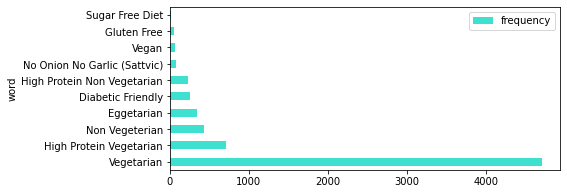

In [7]:
#we'll use the embeddings for classification later
counts_ingr = collections.Counter(df_indianRecipes['Diet'])
most_common = counts_ingr.most_common()
mc = pd.DataFrame(most_common, columns=['word', 'frequency'])
mc.plot(kind='barh', x='word', color='turquoise',figsize=(7,3))

In [8]:
#more preprocessing on the text fields
df_indianRecipes['TranslatedIngredients'] = df_indianRecipes['TranslatedIngredients'].apply(lambda x: x.lower())

total_ingredients = []
all_receipes_ingredients =  []
for i in range(len(df_indianRecipes)):
    all_ingredients = list()
    #split each recipe into different ingredients
    try:
        ingred = df_indianRecipes.loc[i, "TranslatedIngredients"][1:-1]
    except:
        continue;
      
    for ing in (ingred.split(',')):
        ing = remove_stopwords(ing)
        ing = strip_numeric(ing)
        ing = re.sub(r'\(.*oz.\)|(®)|(.*ed)|(.*ly)|tast|sprig|inch|purpose|flmy|taste|boneless|skinless|chunks|fresh|large|cook drain|green|frozen|ground|tablespoon|teaspoon|cup','',ing).strip()
        ing = strip_short(ing,2)
        ing = strip_multiple_whitespaces(ing)
        ing = strip_punctuation(ing)
        ing = strip_non_alphanum(ing)
        
        #convert plurals to singular e.g. tomatoes --> tomato
        ing = (" ".join(TextBlob(ing).words.singularize()))
        if len(ing)>0:
            all_ingredients.append(ing)
            total_ingredients.append(ing)
    all_receipes_ingredients.append(all_ingredients)
counts_ingr = collections.Counter(total_ingredients)

---- Most Common Ingredients ----
[('salt', 4870), ('turmeric powder haldi', 1912), ('chilli powder', 1804), ('jeera', 1283), ('sunflower oil', 1181), ('chilly', 972), ('sugar', 896), ('curry leaf', 876), ('asafoetida hing', 803), ('garam masala powder', 798), ('s', 728), ('coriander powder dhanium', 727), ('black pepper powder', 712), ('lemon juice', 689), ('water', 642), ('ghee', 622), ('cumin powder jeera', 616), ('extra virgin olive oil', 562), ('clove garlic', 528), ('milk', 505), ('cinnamon stick dalchini', 494), ('flmy maida', 471), ('wheat flmy', 451), ('curd dahi yogurt', 446), ('clove laung', 411)]


---- Least Common Ingredients ----
[('liter curd dahi yogurt', 1), ('ml milk fat', 1), ('aloe vera leaf', 1), ('citric acid crystal', 1), ('छ ट चम मच ल ल म र च प उड', 1), ('half half cream milk', 1), ('risotto recipe below', 1), ('gorgonzola cheese cut cube', 1), ('homemade pizza pastum sauce marinara sauce serving', 1), ('vegetable stock chicken broth', 1)]
type counts ingr <cla

<AxesSubplot:ylabel='word'>

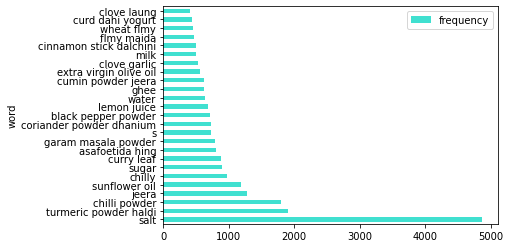

In [9]:
#find the most common ingredients used across all recipes
print ("---- Most Common Ingredients ----")
print (counts_ingr.most_common(25))

print ("\n")
#find the most common ingredients used across all recipes
print ("---- Least Common Ingredients ----")
print (counts_ingr.most_common()[-10:])
print("type counts ingr",type(counts_ingr))

most_common = counts_ingr.most_common(25)
mc = pd.DataFrame(most_common, columns=['word', 'frequency'])

#print("\nMost common:\n", mc)
mc.plot(kind='barh', x='word', align='center', color='turquoise')

In [ ]:


#convert to lower case
df_indianRecipes['TranslatedInstructions'] = df_indianRecipes['TranslatedInstructions'].apply(lambda x: x.lower())

#total_ingredients = []
all_instructions =  []

#len(df_indianRecipes)
for i in range(len(df_indianRecipes)):
    #split each recipe into different ingredients
    try:
        instrs = df_indianRecipes.loc[i, "TranslatedInstructions"][1:-1]
        #print("instrs\n",instrs)
    except:
        continue;      
    for instr in (instrs.split('.')):
        instr = remove_stopwords(instr)
        instr = strip_numeric(instr)
        #instr = re.sub(r'\(.*oz.\)|(®)|(.*ed)|(.*ly)|tast|sprig|inch|purpose|flmy|taste|boneless|skinless|chunks|fresh|large|cook drain|green|frozen|ground|tablespoon|teaspoon|cup','',ing).strip()
        instr = strip_short(instr,2)
        instr = strip_multiple_whitespaces(instr)
        instr = strip_punctuation(instr)
        instr = strip_non_alphanum(instr)
        #convert plurals to singular e.g. tomatoes --> tomato
        instr = (" ".join(TextBlob(instr).words.singularize()))
        if len(instr)>0:
            all_instructions.append(instr)

print("len",len(all_instructions))

#formatting the column in a way the gensim takes it
all_instructions_splitted = [sentx.split() for sentx in all_instructions]
df_indianRecipes.to_pickle("/home/somi/ampba/fp1/chef/data/external/df_indianRecipes.pkl")

In [12]:
#record the number of ingredients for each recipe, 
#add cleaned instructions for training recipe embeddings
#add cleaned ingredients back to original dataframe
df_indianRecipes['clean_ingredients'] = pd.Series(all_receipes_ingredients)
df_indianRecipes = df_indianRecipes.dropna()
df_indianRecipes['ingredient_count'] =  df_indianRecipes.apply(lambda row: len(row['clean_ingredients']), axis = 1)
df_indianRecipes['clean_instructions'] = df_indianRecipes['TranslatedInstructions'].apply(lambda x: x.lower())
df_indianRecipes['clean_instructions'].head()

/tmp/ipykernel_12869/2901904207.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indianRecipes['ingredient_count'] =  df_indianRecipes.apply(lambda row: len(row['clean_ingredients']), axis = 1)
/tmp/ipykernel_12869/2901904207.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indianRecipes['clean_instructions'] = df_indianRecipes['TranslatedInstructions'].apply(lambda x: x.lower())


0    to begin making the masala karela recipe,de-se...
1    to make tomato puliogere, first cut the tomato...
2    to begin making the ragi vermicelli recipe, fi...
3    to begin making gongura chicken curry recipe f...
4    to make andhra style alam pachadi, first heat ...
Name: clean_instructions, dtype: object

In [13]:
df_indianRecipes.to_pickle("/home/somi/ampba/fp1/chef/data/external/df_indianRecipes.pkl")


In [15]:
def process_recipe(recipe):
    recipeProcessed = []
    for ing in (recipe.split(',')):
        ing = remove_stopwords(ing)
        ing = strip_numeric(ing)
        ing = re.sub(r'\(.*oz.\)|(®)|(.*ed)|(.*ly)|tast|sprig|inch|purpose|flmy|taste|boneless|skinless|chunks|fresh|large|cook drain|green|frozen|ground|tablespoon|teaspoon|recipe|cup','',ing).strip()
        ing = strip_short(ing,2)
        ing = strip_multiple_whitespaces(ing)
        ing = strip_punctuation(ing)
        ing = strip_non_alphanum(ing)
        if ing:
            #print("ing",ing)
            recipeProcessed.append(ing)
    #print("recipeProcessed",len(recipeProcessed),recipeProcessed)
    return [oneInstr.split() for oneInstr in recipeProcessed]

process_recipe(df_indianRecipes['clean_instructions'][10])

[['beans'],
 ['step',
  'cook',
  'them',
  'like',
  'pressure',
  'cooker',
  'method',
  'cook',
  'beans',
  'place',
  'beans',
  'pressure'],
 ['place', 'weight'],
 ['cover', 'pan', 'cook', 'water', 'heat', 'whistles'],
 ['ium',
  'heat',
  'add',
  'onions',
  'garlic',
  'light',
  'sauté',
  'onions',
  'tender',
  'add',
  'tomatoes'],
 ['tomatoes', 'cover', 'pan'],
 ['beans', 'coriander', 'leaves', 'serve', 'toast'],
 ['potato', 'cakes']]

In [16]:
#adding clean instructions
df_indianRecipes['clean_instructions'] = df_indianRecipes['clean_instructions'].apply(lambda x:process_recipe(x))
print(df_indianRecipes['clean_instructions'][1])

[['tomato', 'puliogere'], ['cut', 'tomatoes', 'mixer', 'grinder', 'puree', 'it', 'heat', 'oil', 'pan', 'oil', 'hot'], ['add', 'chana', 'dal'], ['urad', 'dal'], ['cashew', 'let', 'cook', 'seconds', 'seconds'], ['chillies'], ['chillies', 'curry', 'leaves', 'seconds'], ['add', 'tomato', 'puree', 'mix', 'add', 'bc', 'belle', 'bhat', 'powder'], ['salt', 'mix', 'it', 'allow', 'cook', 'minutes', 'turn', 'gas', 'bowl'], ['rice', 'mix', 'it', 'serve', 'hot', 'serve', 'tomato', 'puliogre', 'tomato', 'cucumber', 'raita', 'papad', 'dinner']]


/tmp/ipykernel_12869/2355530099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_indianRecipes['clean_instructions'] = df_indianRecipes['clean_instructions'].apply(lambda x:process_recipe(x))


In [17]:
sentenced_Instructions = df_indianRecipes['clean_instructions']
#all_Sentences is the list of sentences in a format that gensim uses
#list of sentences, where every sentence is a list of words
all_Sentences = []
for sentence in sentenced_Instructions:
    all_Sentences.extend(sentence)
print(len(sentenced_Instructions),"recipes!")
print(len(all_Sentences),"sentences!")

6853 recipes!
67578 sentences!


In [ ]:
model_indianfood_fasttext = FastText(window=5, min_count=5, workers=4,sg=1)
model_indianfood_fasttext.build_vocab(corpus_iterable=all_Sentences)
total_examples = model_indianfood_fasttext.corpus_count
print("training model!")
model_indianfood_fasttext.train(corpus_iterable=all_Sentences, total_examples=total_examples, epochs=5)
print("saving model!")
model_indianfood_fasttext.save("/home/somi/ampba/fp1/chef/nlp/models/model_indianfood_fasttext.model")

In [27]:
#model_indianfood_fasttext.save("models/model_indianfood_fasttext.model")
total_words1 = model_indianfood_fasttext.corpus_total_words
print(total_words1,"words in Recipe based model Corpus!")

model_indianfood_fasttext.wv.most_similar("Anjeer arfi")

479771 words in Recipe based model Corpus!


[('kanda', 0.8876957893371582),
 ('bisi', 0.8729786276817322),
 ('kesar', 0.8711988925933838),
 ('kanji', 0.8662550449371338),
 ('tukda', 0.866100013256073),
 ('khaja', 0.8641085028648376),
 ('khao', 0.8616626858711243),
 ('khaman', 0.858319878578186),
 ('gulkand', 0.855658233165741),
 ('karnataka', 0.8541282415390015)]

In [29]:
#defined functions to get to embeddings for recipes
def getSentenceEmbedding(sentence):
    countFound = 0
    embeddingList = []
    for wordx in sentence:
        try:
            vector1 = model_indianfood_fasttext.wv[wordx]
            #print("word",wordx, vector1[:3])
            embeddingList.append(vector1)
            countFound+=1
        except:
            continue;
    sumEmbeddings = sum(embeddingList)
    return np.true_divide(sumEmbeddings, countFound)  

def getRecipeEmbedding(instruction):
    embeddingList = []
    for sentence in instruction:
        embeddingList.append(getSentenceEmbedding(sentence))
    sumEmbeddings = sum(embeddingList)
    return np.true_divide(sumEmbeddings, len(instruction))  

In [30]:
df_indianRecipes['recipe_embedding_fasttext'] =  df_indianRecipes.apply(lambda row: getRecipeEmbedding(row['clean_instructions']), axis = 1)

/tmp/ipykernel_12869/1697307451.py:14: RuntimeWarning: invalid value encountered in divide
  return np.true_divide(sumEmbeddings, countFound)
/tmp/ipykernel_12869/1697307451.py:21: RuntimeWarning: invalid value encountered in divide
  return np.true_divide(sumEmbeddings, len(instruction))


In [32]:
#checking out the new column
df_indianRecipes.to_pickle('/home/somi/ampba/fp1/chef/data/external/df_indianRecipes.pkl')
df_indianRecipes.head()

,TranslatedRecipeName,TranslatedIngredients,Cuisine,Course,Diet,TranslatedInstructions,URL,clean_ingredients,ingredient_count,clean_instructions,recipe_embedding_fasttext
0,Masala Karela Recipe,"6 karela (bitter gourd/ pavakkai) - deseeded,s...",Indian,Side Dish,Diabetic Friendly,"to begin making the masala karela recipe,de-se...",https://www.archanaskitchen.com/masala-karela-...,"[salt, gram flmy besan, turmeric powder haldi,...",8,"[[begin, making, masala, karela], [karela, sli...","[0.30030733, 0.30978018, -0.20379457, 0.193895..."
1,Spicy Tomato Rice (Recipe),"2-1 / 2 cups rice - cooked, 3 tomatoes, 3 teas...",South Indian Recipes,Main Course,Vegetarian,"to make tomato puliogere, first cut the tomato...",http://www.archanaskitchen.com/spicy-tomato-ri...,"[tomato, bc belle bhat powder, salt, chickpea ...",10,"[[tomato, puliogere], [cut, tomatoes, mixer, g...","[0.2121584, 0.22899196, 0.009121152, 0.1425818..."
2,Ragi Semiya Upma Recipe - Ragi Millet Vermicel...,"1-1/2 cups rice vermicelli noodles (thin),1 on...",South Indian Recipes,South Indian Breakfast,High Protein Vegetarian,"to begin making the ragi vermicelli recipe, fi...",http://www.archanaskitchen.com/ragi-vermicelli...,"[rice vermicelli noodle thin, pea matar, chill...",9,"[[begin, making, ragi, vermicelli], [firm, kee...","[0.17307988, 0.26838744, -0.02938044, 0.144444..."
3,Gongura Chicken Curry Recipe - Andhra Style Go...,"500 grams chicken,2 onion - chopped,1 tomato -...",Andhra,Lunch,Non Vegeterian,to begin making gongura chicken curry recipe f...,http://www.archanaskitchen.com/gongura-chicken...,"[gram chicken, chilly slit, turmeric powder ha...",12,"[[ients, aside, in, small, pan], [ium, heat], ...","[0.14832231, 0.26647928, -0.09548085, 0.163823..."
4,Andhra Style Alam Pachadi Recipe - Adrak Chutn...,"1 tablespoon chana dal, 1 tablespoon white ura...",Andhra,South Indian Breakfast,Vegetarian,"to make andhra style alam pachadi, first heat ...",https://www.archanaskitchen.com/andhra-style-a...,"[chana dal, white urad dal, chilly, es ginger ...",11,"[[andhra, style, alam, pachadi], [chillies], [...","[0.19733743, 0.19687451, 0.04915007, 0.1387914..."


In [33]:
#finding similar food-items using trained embeddings only

from numpy import dot
from numpy.linalg import norm

def find_Similar_dish(xx,embeddingToUse):
    #recipe_embedding_fasttext

    a = df_indianRecipes.loc[xx, embeddingToUse]
    orn = df_indianRecipes.loc[xx, "TranslatedRecipeName"]
    print(orn,"\nGetting most similar dishes based on",embeddingToUse)
    dishtances = {}
    for i in range(len(df_indianRecipes)):
        if i==xx:
            continue
        try:
            dn = df_indianRecipes.loc[i, "TranslatedRecipeName"]
            b = df_indianRecipes.loc[i, embeddingToUse]
            cos_sim = dot(a, b)/(norm(a)*norm(b))
            if cos_sim not in dishtances.values():
                dishtances[i] = cos_sim
        except:
            continue
            
    dishtances_2 = {k: v for k, v in sorted(dishtances.items(), key=lambda item: item[1], reverse = True)}
    mostSimilarDishes = []
    countSim = 0
    for el in dishtances_2.keys():
        mostSimilarDishes.append(el)
        countSim+=1
        if countSim==10:
            break
    return mostSimilarDishes

def list_Similar_dishes(xx, embeddingToUse):
    dn = df_indianRecipes.loc[xx, "TranslatedRecipeName"]
    additionalColumns = ['Cuisine','Course','Diet']
    similarList1 = find_Similar_dish(xx,embeddingToUse)
    simResults1 = []

    allSuggestedDishNames = []
    print("got all similar dishes!")
    for simIndex in similarList1:
        tempRes = []
        dName = df_indianRecipes.loc[simIndex, "TranslatedRecipeName"]
        dishName = " ".join([w for w in dName.split() if w.lower()!='recipe'])
        tempRes.append(dishName)
        dishNameShort = " ".join(dishName.split()[-2:])
        allSuggestedDishNames.append(dishNameShort)
        for col in additionalColumns:
            tempRes.append(df_indianRecipes.loc[simIndex, col])
        simResults1.append(tempRes)
    
    additionalColumns.insert(0,"Dish")
    print(dn)
    return(pd.DataFrame(simResults1, columns = additionalColumns),allSuggestedDishNames)


In [34]:
dishNumber = 311
res = list_Similar_dishes(dishNumber, "recipe_embedding_fasttext")
res[0]

Kashmiri Style Chicken Pulao Recipe 
Getting most similar dishes based on recipe_embedding_fasttext
got all similar dishes!
Kashmiri Style Chicken Pulao Recipe


,Dish,Cuisine,Course,Diet
0,Bengali Doi Maach (Fish In Yogurt Curry),Bengali Recipes,Lunch,Non Vegeterian
1,Veg Makhanwala - North Indian Mixed Vegetables...,North Indian Recipes,Lunch,Vegetarian
2,Delicious Methi Chicken Curry - Murgh Methi Curry,North Indian Recipes,Dinner,Non Vegeterian
3,Tomato pulao,Karnataka,Lunch,Vegetarian
4,Kadai Chicken - Chicken Cooked With Onion And ...,North Indian Recipes,Side Dish,Non Vegeterian
5,Karnataka Steel Awarekalu Pulao - Awarekalu Pulao,Karnataka,Dinner,Vegetarian
6,Lugai Gosht - Mutton In Spicy Tomato Onion Gravy,North Indian Recipes,Dinner,Non Vegeterian
7,Kashmiri Style Yakhni Pulao With Chicken,Kashmiri,Lunch,Non Vegeterian
8,Bhindi Masala Gravy - Ladies Finger In Tomato ...,North Indian Recipes,Side Dish,Vegetarian
9,Thalapakattu Chicken Biryani,Tamil Nadu,Main Course,Non Vegeterian


In [38]:
df_indianRecipes.to_csv('/home/somi/ampba/fp1/chef/data/external/df_indianRecipes.csv', index=False)

In [ ]:
{
  "name": "Masala Karela Recipe",
  "description": "None",
  "cuisine": "Indian",
  "course": "Side Dish",
  "diet": "Diabetic Friendly",
  "ingridients": ["Karela (Bitter Gourd/ Pavakkai)","Salt","Onion","Gram flour (besan)","Turmeric powder (Haldi)","Red Chilli powder","Cumin seeds (Jeera)","Coriander Powder (Dhania)","Amchur (Dry Mango Powder)","Sunflower Oil"],
  "instruction": "To begin making the Masala Karela Recipe,de-seed the karela and slice. Do not remove the skin as the skin has all the nutrients. Add the karela to the pressure cooker with 3 tablespoon of water, salt and turmeric powder and pressure cook for three whistles. Release the pressure immediately and open the lids. Keep aside.Heat oil in a heavy bottomed pan or a kadhai. Add cumin seeds and let it sizzle.Once the cumin seeds have sizzled, add onions and saute them till it turns golden brown in color.Add the karela, red chilli powder, amchur powder, coriander powder and besan. Stir to combine the masalas into the karela.Drizzle a little extra oil on the top and mix again. Cover the pan and simmer Masala Karela stirring occasionally until everything comes together well. Turn off the heat.Transfer Masala Karela into a serving bowl and serve.Serve Masala Karela along with Panchmel Dal and Phulka for a weekday meal with your family."
}